# Random Forest

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('CDR-Call-Details.csv')#load the dataset

In [4]:
df

,Phone Number,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,382-4657,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,371-7191,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,358-1921,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,375-9999,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,330-6626,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101169,789-9756,222,0,228.2,60,22.82,229.8,289,28.26,222.8,222,2.28,6.2,2,2.62,2,False
101170,798-5885,88,0,282.2,222,82.88,208.8,220,22.82,282.2,200,20.68,9.8,8,2.82,8,False
101171,798-5798,22,0,222.2,62,88.66,228.0,228,22.08,62.2,209,2.26,2.8,6,2.22,2,False
101172,999-9897,228,0,222.0,99,88.08,220.2,80,22.92,282.9,28,20.22,2.2,8,0.82,0,False


In [5]:
df.head()

,Phone Number,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,382-4657,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,371-7191,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,358-1921,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,375-9999,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,330-6626,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101174 entries, 0 to 101173
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Phone Number    101174 non-null  object 
 1   Account Length  101174 non-null  int64  
 2   VMail Message   101174 non-null  int64  
 3   Day Mins        101174 non-null  float64
 4   Day Calls       101174 non-null  int64  
 5   Day Charge      101174 non-null  float64
 6   Eve Mins        101174 non-null  float64
 7   Eve Calls       101174 non-null  int64  
 8   Eve Charge      101174 non-null  float64
 9   Night Mins      101174 non-null  float64
 10  Night Calls     101174 non-null  int64  
 11  Night Charge    101174 non-null  float64
 12  Intl Mins       101174 non-null  float64
 13  Intl Calls      101174 non-null  int64  
 14  Intl Charge     101174 non-null  float64
 15  CustServ Calls  101174 non-null  int64  
 16  Churn           101174 non-null  bool   
dtypes: bool(1)

### Data Cleaning Process

In [8]:
df.isna().sum()

Phone Number      0
Account Length    0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn             0
dtype: int64

In [9]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
101169    False
101170    False
101171    False
101172    False
101173    False
Length: 101174, dtype: bool

In [10]:
df.duplicated().sum()

40729

In [11]:
df_remove_duplicates=df.drop_duplicates()
df_remove_duplicates

,Phone Number,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,382-4657,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,371-7191,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,358-1921,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,375-9999,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,330-6626,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101169,789-9756,222,0,228.2,60,22.82,229.8,289,28.26,222.8,222,2.28,6.2,2,2.62,2,False
101170,798-5885,88,0,282.2,222,82.88,208.8,220,22.82,282.2,200,20.68,9.8,8,2.82,8,False
101171,798-5798,22,0,222.2,62,88.66,228.0,228,22.08,62.2,209,2.26,2.8,6,2.22,2,False
101172,999-9897,228,0,222.0,99,88.08,220.2,80,22.92,282.9,28,20.22,2.2,8,0.82,0,False


In [12]:
original_row_count = df.shape[0]
print("Original number of rows:", original_row_count)


Original number of rows: 101174


In [13]:
duplicate_rows = df_remove_duplicates[df_remove_duplicates.duplicated()]
print("Number of remaining duplicate rows:", duplicate_rows.shape[0])


Number of remaining duplicate rows: 0


In [14]:
removed_rows = original_row_count - df_remove_duplicates.shape[0]
print("Number of rows removed:", removed_rows)


Number of rows removed: 40729


In [15]:
print("no.of rows in dataframe after removing:",df_remove_duplicates.shape[0])

no.of rows in dataframe after removing: 60445


In [16]:
df_remove_duplicates.describe()#describe before removing outlier

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,60445.000000,60445.000000,60445.000000,60445.000000,60445.000000,60445.000000,60445.000000,60445.000000,60445.000000,60445.000000,60445.000000,60445.000000,60445.000000,60445.000000,60445.000000
mean,329.385541,18.101613,596.555649,274.752138,64.880486,669.288486,272.647911,34.894168,661.395415,267.133377,14.066812,20.571371,5.728894,4.315376,2.563438
std,1436.763064,76.859936,2231.437206,997.047766,134.695269,2476.768325,956.454815,36.584588,2422.994289,913.240573,16.532483,25.494288,8.271802,2.711543,2.376449
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.300000,20.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,0.000000,222.200000,88.000000,24.220000,223.400000,88.000000,22.220000,223.200000,88.000000,6.220000,8.800000,2.000000,2.280000,2.000000
50%,200.000000,0.000000,262.200000,202.000000,32.920000,268.800000,200.000000,24.900000,269.110000,200.000000,9.220000,20.200000,4.000000,2.920000,2.000000
75%,243.000000,22.000000,404.400000,226.000000,80.480000,440.400000,226.000000,32.620000,440.400000,226.000000,20.400000,22.800000,8.000000,4.940000,4.000000
max,21111.000000,1111.000000,111111.110000,21111.000000,1111.990000,111111.200000,21111.000000,211.990000,111111.110000,21111.000000,211.920000,211.900000,211.000000,11.920000,11.000000


In [17]:

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_remove_duplicates['Churn']=le.fit_transform(df_remove_duplicates.Churn)

In [18]:
df1=df_remove_duplicates.drop('Phone Number',axis=1)
df1.sample(20)


,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
20684,226,0,223.20,26,32.920,222.2,232,23.22,232.20,30,6.93,20.2,2,2.230,3,0
71403,488,0,464.40,94,44.860,444.4,94,48.08,460.40,48,44.44,44.4,8,8.490,4,0
88143,288,0,288.90,82,22.260,266.2,220,22.22,298.80,289,8.22,28.2,8,2.260,2,0
31166,39,0,223.60,203,22.330,223.0,90,23.22,232.20,203,3.23,3.2,3,2.260,2,0
32196,220,0,222.20,203,22.000,222.3,33,22.32,223.30,39,22.02,3.3,2,2.300,2,0
1799,132,0,163.20,80,27.740,167.6,90,14.25,87.50,90,3.94,6.2,10,1.670,1,0
75289,242,0,222.40,244,29.240,299.2,223,23.94,222.20,204,3.22,20.2,4,2.240,0,0
48186,98,29,286.80,328,28.260,329.8,208,28.26,32.20,98,8.20,32.8,8,8.880,2,0
61087,440,0,404.60,444,44.480,449.8,44,44.44,488.40,64,44.48,6.8,8,4.460,4,0
6085,55,59,459.50,404,45.680,478.5,447,45.46,446.50,404,44.09,8.4,4,4.490,5,0


In [19]:
df1.quantile(0.25)

Account Length     68.00
VMail Message       0.00
Day Mins          222.20
Day Calls          88.00
Day Charge         24.22
Eve Mins          223.40
Eve Calls          88.00
Eve Charge         22.22
Night Mins        223.20
Night Calls        88.00
Night Charge        6.22
Intl Mins           8.80
Intl Calls          2.00
Intl Charge         2.28
CustServ Calls      2.00
Churn               0.00
Name: 0.25, dtype: float64

In [20]:
df1.quantile(0.75)

Account Length    243.00
VMail Message      22.00
Day Mins          404.40
Day Calls         226.00
Day Charge         80.48
Eve Mins          440.40
Eve Calls         226.00
Eve Charge         32.62
Night Mins        440.40
Night Calls       226.00
Night Charge       20.40
Intl Mins          22.80
Intl Calls          8.00
Intl Charge         4.94
CustServ Calls      4.00
Churn               0.00
Name: 0.75, dtype: float64

In [21]:
numeric_cols=df1.select_dtypes(include=['number']).columns
numeric_cols

Index(['Account Length', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

In [22]:


# Assuming df1 is your DataFrame after removing duplicates
# and numeric_cols contains the numeric column names
 # Replace with your actual numeric columns

# Function to remove outliers based on IQR
def remove_outliers_iqr(df1, numeric_cols):
    df_cleaned = df1.copy()
    for col in numeric_cols:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out the outliers
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

# Remove outliers from df1 and store it in a new DataFrame
df_cleaned = remove_outliers_iqr(df1, numeric_cols)

# Save the cleaned DataFrame to a new CSV file if needed
df_cleaned.to_csv('df_cleaned.csv', index=False)

# Print the shape of the cleaned DataFrame to verify
print("Original DataFrame shape:", df1.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)


Original DataFrame shape: (60445, 16)
Cleaned DataFrame shape: (12773, 16)


In [23]:
data=df_cleaned

In [78]:
data.describe()#describe after removing outlier

,Account_Length,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
count,12773.000000,12773.000000,12773.000000,12773.000000,12773.000000,12773.000000,12773.000000,12773.000000,12773.000000,12773.000000,12773.000000,12773.000000,12773.000000,12773.000000,12773.0,12773.0
mean,144.481015,7.594066,238.458278,146.773350,33.921774,247.493873,150.256557,24.371034,247.198425,146.414155,11.309709,13.497518,3.958741,2.729552,2.0,0.0
std,95.629348,13.153858,47.759502,85.518438,17.214881,34.915424,85.563891,3.580700,35.282845,84.777095,8.139631,8.217521,2.390136,0.691683,0.0,0.0
min,2.000000,0.000000,63.200000,20.000000,6.220000,155.500000,20.000000,13.220000,132.000000,20.000000,2.000000,1.100000,1.000000,0.280000,2.0,0.0
25%,43.000000,0.000000,222.200000,82.000000,22.930000,222.900000,86.000000,22.230000,222.600000,86.000000,4.040000,6.200000,2.000000,2.240000,2.0,0.0
50%,116.000000,0.000000,232.200000,115.000000,28.820000,233.200000,202.000000,23.220000,233.000000,116.000000,9.030000,9.800000,3.000000,2.440000,2.0,0.0
75%,223.000000,22.000000,268.600000,222.000000,33.660000,280.800000,222.000000,26.860000,282.200000,222.000000,20.320000,22.200000,6.000000,2.920000,2.0,0.0
max,329.000000,50.000000,444.400000,329.000000,82.980000,362.300000,329.000000,32.990000,362.900000,329.000000,32.980000,32.900000,12.000000,4.970000,2.0,0.0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12773 entries, 42 to 101169
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  12773 non-null  int64  
 1   VMail Message   12773 non-null  int64  
 2   Day Mins        12773 non-null  float64
 3   Day Calls       12773 non-null  int64  
 4   Day Charge      12773 non-null  float64
 5   Eve Mins        12773 non-null  float64
 6   Eve Calls       12773 non-null  int64  
 7   Eve Charge      12773 non-null  float64
 8   Night Mins      12773 non-null  float64
 9   Night Calls     12773 non-null  int64  
 10  Night Charge    12773 non-null  float64
 11  Intl Mins       12773 non-null  float64
 12  Intl Calls      12773 non-null  int64  
 13  Intl Charge     12773 non-null  float64
 14  CustServ Calls  12773 non-null  int64  
 15  Churn           12773 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 1.7 MB


In [25]:
import pandas as pd

# Assuming df1 is your DataFrame
# Replace spaces with underscores in column names
data.columns = data.columns.str.replace(' ', '_')

# Verify the updated column names
print(data.columns)


Index(['Account_Length', 'VMail_Message', 'Day_Mins', 'Day_Calls',
       'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins',
       'Night_Calls', 'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls', 'Churn'],
      dtype='object')


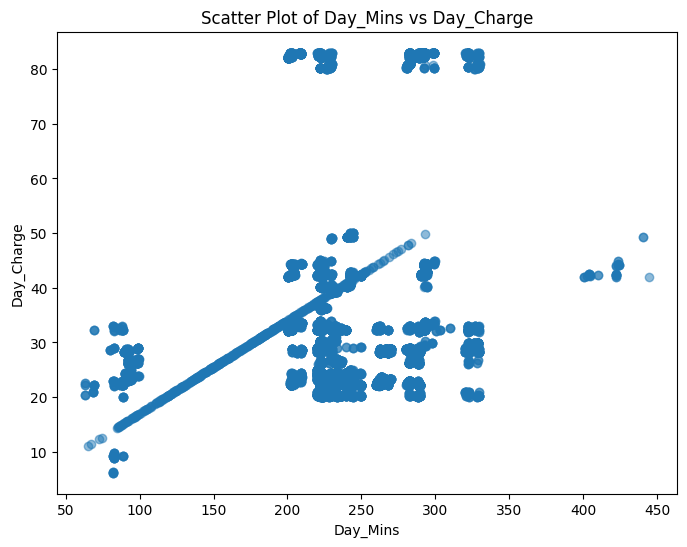

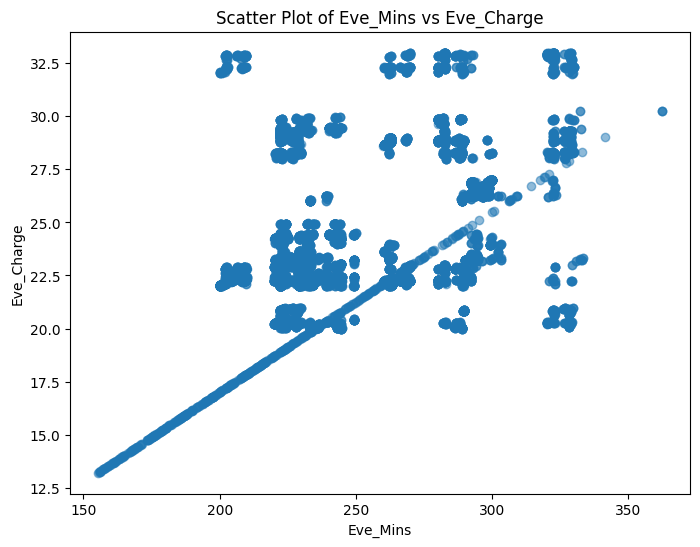

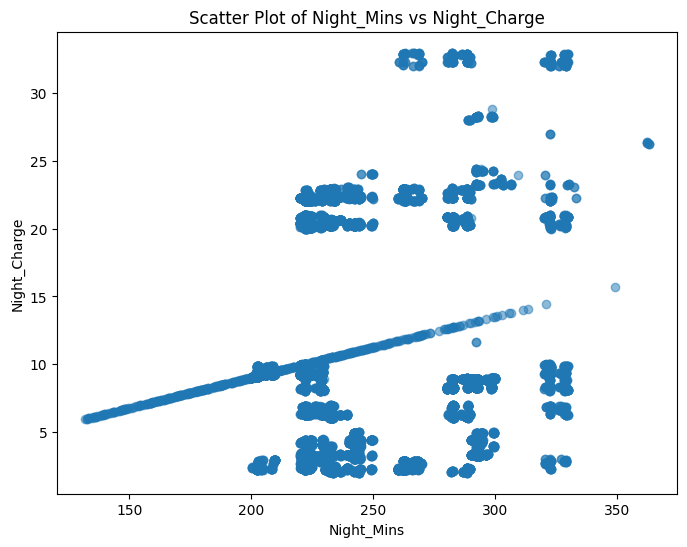

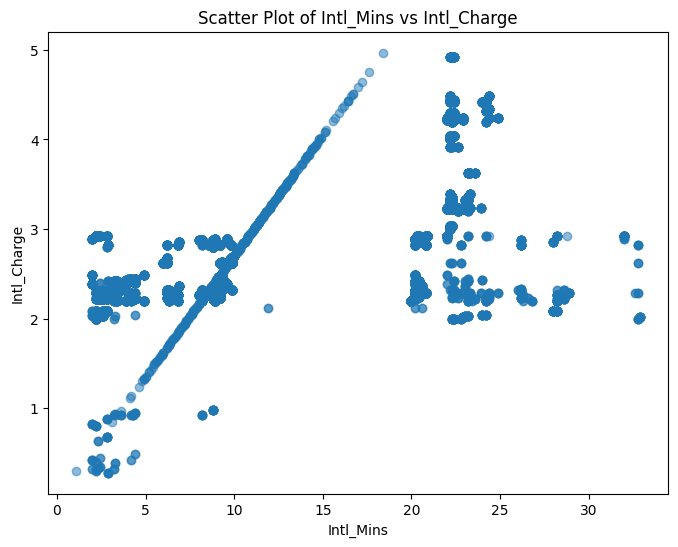

In [26]:
import matplotlib.pyplot as plt
# List of feature pairs 
feature_pairs = [
    ('Day_Mins', 'Day_Charge'),
    ('Eve_Mins', 'Eve_Charge'),
    ('Night_Mins', 'Night_Charge'),
    ('Intl_Mins', 'Intl_Charge'),
    # ...
]

# scatter plots for each pair
for x, y in feature_pairs:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x], data[y], alpha=0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Scatter Plot of {x} vs {y}')
    plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [28]:
x=df1.drop('Churn',axis=1)
y=df1['Churn']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
model=RandomForestClassifier()

In [31]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
model.score(x_test,y_test)

0.9406898833650426

In [33]:
accuracy = round(model.score(x_test, y_test) * 100, 2)
print("Accuracy of the model is:", accuracy, "%")


Accuracy of the model is: 94.07 %


In [34]:
import warnings
warnings.filterwarnings('ignore')
model.predict([['222','0','262.2','116','211.22','222.11','112','211.090','229.20','2112','22.220','22.2','2','11.112','2']])

array([1], dtype=int64)

In [35]:
import warnings
warnings.filterwarnings('ignore')
model.predict([['96','20','2011.6','90','211.26','206.20','2112','22.112','226.11','2211','11.611','211.2','2','11.620','0']])

array([0], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
y_predicted=model.predict(x_test)
cm=confusion_matrix(y_test,y_predicted)
cm

array([[10478,   216],
       [  501,   894]], dtype=int64)

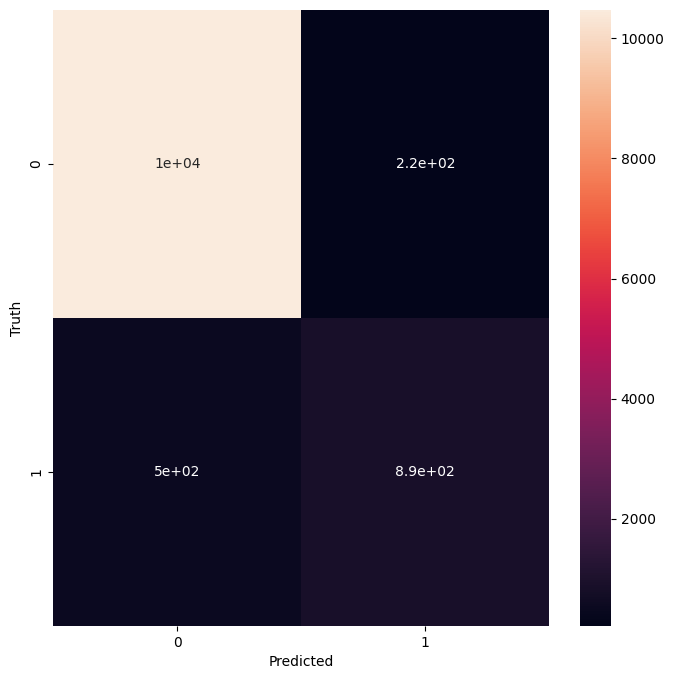

In [38]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

TN , FP 

FN , TP 

True Negatives (TN): 10460

Correctly predicted as not churned (0).
False Positives (FP): 234

Incorrectly predicted as churned (1) when they did not churn (0).
False Negatives (FN): 500

Incorrectly predicted as not churned (0) when they actually churned (1).
True Positives (TP): 895
